DATA 300 - Professor Kennedy Odongo 
FALL 2023 - HW1
Tai Nguyen

# Theory part

1. 
a. Bias and variance in Machine Learning
- Bias refers to the error introduced when using a model to analyze a real-world problem. It represents the model's tendency to underpredict or overpredict true vales.  
- Variance refers to the model's sensitivity to changes made to the training set. It measures the extent to which the model's predictions vary when trained on different subsets of the same dataset.

b. Bias-variance tradeoff is a concept in machine learning that involves finding the right balance between two types of errors: underfitting (high bias) and overfitting (high variance).

c. High bias (underfitting) occurs when a model is too simple and cannot capture the underlying patterns in data, leading to systematic errors. High variance (overfitting) arises when a model is overly complex and fits the noise in the data, resulting in errors that vary widely with different datasets. Achieving the optimal tradeoff minimizes both bias and variance, leading to a model that generalizes well to new data and performs effectively.

2. 
Assumptions in linear regression
- Lineariality (the relationship between the independent variables (predictors) and the dependent variable (target) is assumed to be linear)
- The independence of error terms (a model making mistake on sample unit i doesn't mean it will likely make the same mistake on unit i+1)
- Normality of errors (the residuals should follow a normal distribution)
- No or little Collinearity (the predictors should not uncorrelated with each other)

3. 
Interpret model coefficients
- if there is no change on the frequency of smoking and others, biking more actually correlates with a lower rate of heart disease 
- meanwhile, if there is no change on the frequency of biking and others, smoking more correlates with a higher rate of heart disease

4. 
a. Equation for the regression
sales = 3.52667 + 0.04576 * youtube + 0.18853 * facebook - 0.00104 * newspaper
b. Interpreting
- Residuals:
Residual values, or visualized using boxplot, indicate that this is a normal/symmetric distribution. For linear regression, we need the residuals to be normally distributed
- Coefficients: 
The coefficients output indicates that if there is no change on other predictors, an additional budget unit spent on youtube advertising correlates with approximately 0.05 increase value on sales. Likewise, an additional budget unit spent on facebook advertising correlates with approximately 0.19 increase value on sales. On the other hand, an additional budget unit spent on newspaper advertising correlates with approximately 0.001 decrease value on sales. Lastly, if ad budget for the three all platforms equals zero, the advertising budget is 3.53
- Standard Error:
Standard errors measure the uncertainty of the model's calculations of coefficients. For the regression, standard values mean the 95% confidence intervals in which coeffients are likely to vary. For example, standard error value of 0.001 means that youtube's actual coefficient may vary within this range. 
- t-value:
The larger t-value is, the more certain we can be that coefficient is not null. For example, looking at t-values of youtube and facebook predictors, we can be certain that their coefficients are greater than null value. On the other hand, we can say that newspaper's coefficient is less than the null value. 
- p-value: 
If p-value is less than the indicated alpha level (typically 0.05), the predictor variable is said to be statistically significant. Looking at the p-value of the regression output, we can see that it is less than 0.05, which could indicate that the predictor variables are statistically insignificant, meaning there is at least 1 independent variable is related to the response variable. 
- R-squared:
R-square (or coefficient of determination) tells us the proportion of the variance in the response variable that can be explained by the predictor variables, ranging from 0 to 1. R-squared value of 0.897 in the output, which is closer to 1, indicates that the predictor variables (youtube, facebook, newspaper) are able to predict well the value of the response variable (sales).
- F-statistic:
We can see from our model, the F-statistic is very large and our p-value is so small - it is basically zero. This would lead us to reject the null hypothesis and conclude that there is strong evidence that a relationship does exist between sales and at least one advertising platform.

# Programming Part

In [12]:
import numpy as np # v 1.21.5
import sklearn # v 1.02.
import pandas as pd # v 1.5.3
import matplotlib.pyplot as plt # v 3.7.1
import statsmodels.api as sm # v.0.13.2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


%matplotlib inline

# 1. Exploratory Data Analysis (EDA)

In [4]:
house = pd.read_csv("/Users/tainguyen103/Desktop/DATA300/California_Houses.csv")
house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [22]:
house.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [5]:
house.shape

(20640, 14)

In [18]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [6]:
house.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [7]:
house.dtypes

Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Latitude                    float64
Longitude                   float64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object

In [8]:
house.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Data has no missing values, which is great! However, suppose there exists some missing values in some particular columns, there are ways we can impute to resolve the problem. Here is a suggesion: 

In [21]:
##find out which column has missing values, and replace with zero
cols_with_missing_values = house.columns[house.isna().sum() > 0]
for col in cols_with_missing_values[:-1]:
    house[col].fillna(house[col].mode()[0])

In [9]:
house.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


/var/folders/yv/rbjy2ldj4sz8gpjwrvqmdsym0000gn/T/ipykernel_20359/2502146826.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


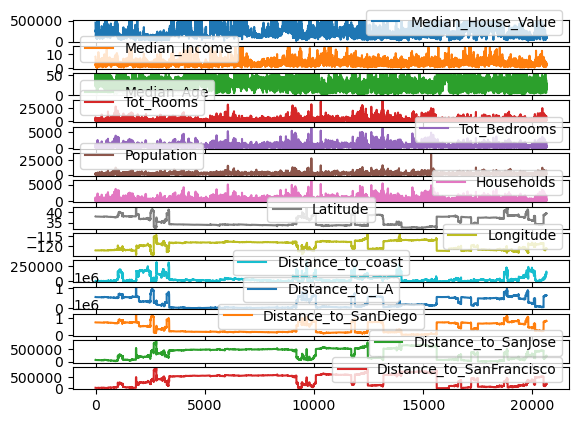

In [17]:
house.plot(subplots=True)
plt.tight_layout()
plt.show()

# 2. Split data into training set and testing set

In [27]:
y = house["Median_House_Value"]
x = house.loc[:, house.columns != "Median_House_Value"] 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=5)

# 3. Regression model & coefficients

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([ 3.92054987e+04,  8.69386746e+02, -6.02807682e+00,  1.00860447e+02,
       -3.90346924e+01,  4.95026248e+01, -4.56118256e+04, -2.71925513e+04,
       -2.27239533e-01, -1.45268955e-01,  2.52093747e-01,  1.67445570e-01,
       -1.39155534e-01])

# 4. R-squared & fitness of model

In [44]:
print(model.intercept_)

-1660183.3976970601


In [45]:
print(model.score(x_test, y_test))

0.6581840974612524


# 5. Predict the response variable on the test set

In [46]:
y_pred = model.predict(x_test)

# 6. Error metrics on the predicted and actual y values

In [47]:
MAE = mean_absolute_error(y_test,y_pred)

In [48]:
MSE = mean_squared_error(y_test,y_pred)

In [49]:
MAPE =  mean_absolute_percentage_error(y_test,y_pred)

In [53]:
MSE, MAE, MAPE

(4848208239.948827, 50732.36276176588, 0.2885650212611001)